![Python_logo](https://th.bing.com/th/id/R.343911fe8de1dae0b84b3e46d20ce55a?rik=Hj8F%2bSKBnvArpg&riu=http%3a%2f%2fswiftsafetyinstitute.org%2fwp-content%2fuploads%2f2021%2f02%2fCovid.png&ehk=zddLxdfchrmaVWVJSfBcLXNlgP7ELhI%2b%2bGhKBONkO7A%3d&risl=&pid=ImgRaw&r=0)
# ( by Nisha Jagtap)


# **Introduction:**
#### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
#### During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

# **COVID-19 Diagnosis Prediction Project**

* Goal: The assignment aims to predict COVID-19 diagnosis based on symptoms
and demographic data, utilizing data analysis and machine learning techniques.
* How: We use Python and MySQL for data analysis, EDA, feature engineering, and
machine learning to predict COVID-19 outcomes.
* Why: Our project is crucial for early COVID-19 detection, efficient healthcare
resource allocation, and informed public health decisions, improving overall wellbeing
---
---


**Q1 . Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

ANS :

Predicting diseases accurately using machine learning, particularly for COVID-19, holds significant importance in today's world as early detection of such diseases on the basis of symptoms can help the healthcare facility to isolate and treat the patient timely, this is crucial to prevent the spread of disease.

**Q2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

ANS:

Our Medical facilities are using tests such as RAT(Rapid Antigen Test) to detect whether a person is covid affected, while our ML model uses patient's data to detect whether a particular patient is covid affected or not with atmost accuracy, this will help to reduce the burden of testing and screening on health care fascilities.

**Q3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.**

ANS:

A bad quality of data or missing data can prove to be a problem for such models but if it works well for COVID-19, we might use a similar approach for other diseases in the future. It's like having a valuable tool for our medical facilities.


----


## **Initial Hypothesis**

1.Prediction Hypothesis: We think we can predict COVID-19 by looking at symptoms and some personal info.

2.Benefits of Accurate Prediction: Accurate prediction can speed up treatment, resource use, and disease management, reducing the strain on healthcare.

3.Common Symptoms Hypothesis: COVID-19 often causes coughing, fever, and breathing problems.

4.Uncommon Symptoms Hypothesis: People without COVID-19 are less likely to have a sore throat or headache.

5.Symptoms in Specific Groups: Men with COVID-19 who've been in contact with people from other countries might have more coughing and fever.

6.Age and Severity Hypothesis: Those 60 and older might have more severe symptoms, especially trouble breathing.


---


## **Dataset Description**
| Variables | Values |
| --------- | ------ |
| Ind_ID | Patient ID |
| Test_date | Date on which test was conducted |
| Cough_symptoms | Whether the patient is having cough symptoms |
| Fever | Whether the patient is having Fever  |
| Sore_throat | Having Sore throat or not |
| Shortness of Breath | Suffering from Shortness of breath or not |
| Headache | Having Headache or not |
| Corona (Target Variable) | Whether the is result covide positive or negative |
| Age_above_60 | Is the patient elder than 60yrs |
| Sex | Male or Female |
| Known_contact | Whom the patient has came in contact with  |


 


## Lets import libraries and load data first

In [710]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Libraries used for Encoding
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score,precision_score,recall_score,f1_score,log_loss

#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV


In [711]:
import warnings
warnings.filterwarnings("ignore") # to ignoring wranings

In [712]:
# To load the data (.csv file)
covid_raw = pd.read_csv('corona_tested_006.csv')

In [713]:
# creating a copy of read file
covid = covid_raw.copy()

# Exploratory Data Analysis- EDA
## Basic exploration
#### Before getting into any sophisticated analysis, the first step is to do an EDA and data cleaning by identifying  erroneous information from that raw data, such as missing values, outliers etc.. Since both categorical and continuous variables are included in the data set.



### Step1: Understanding the data

In [714]:
covid_raw.shape # we can see there are total 278848 rows and 11 columns

(278848, 11)

In [715]:
covid_raw.head().T

,0,1,2,3,4
Ind_ID,1,2,3,4,5
Test_date,11-03-2020,11-03-2020,11-03-2020,11-03-2020,11-03-2020
Cough_symptoms,True,False,False,True,True
Fever,False,True,True,False,False
Sore_throat,True,False,False,False,False
Shortness_of_breath,False,False,False,False,False
Headache,False,False,False,False,False
Corona,negative,positive,positive,negative,negative
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN


#### From the **head** command it is clear that there are missing values in the dataset, as there are NaN in checking account.

In [716]:
covid_raw.tail().T

,278843,278844,278845,278846,278847
Ind_ID,278844,278845,278846,278847,278848
Test_date,30-04-2020,30-04-2020,30-04-2020,30-04-2020,30-04-2020
Cough_symptoms,False,False,False,False,False
Fever,False,False,False,False,False
Sore_throat,False,False,False,False,False
Shortness_of_breath,False,False,False,False,False
Headache,False,False,False,False,False
Corona,positive,negative,negative,negative,negative
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,male,female,male,male,female


#### From the tail command it is clear that there are missing values in the dataset, as there is are NaN in checking account.

In [717]:
covid_raw.info() # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


We have 1 numerical and 10 categorical features based on info functions. 
However, it seems that **Age_60_above** variable is unnecessary and just have many missing(NaN) values.
Similary **Test_date** is a date value but coded as Object.
Hence, we have to treat it as numerical/date.

In [718]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


### Summary of continuous variable

In [719]:
covid.describe(include = 'all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking unique values

In [720]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [721]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
unique Value in Cough_symptoms: [True False nan]
unique Value in Fever: [False True nan]
unique Value in Sore_throat: [True False nan]
unique Value in Shortness_of_breath: [False True nan]
unique Value in Headache: [False True

## Analysing the amount of missing values

In [722]:
# create a table with data missing 
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,0,0.000000
Cough_symptoms,252,0.090372
Fever,252,0.090372
Sore_throat,1,0.000359
Shortness_of_breath,1,0.000359
Headache,1,0.000359
Corona,0,0.000000
Age_60_above,127320,45.659284
Sex,19563,7.015650


#### cough_symptoms,Fever, Sex contains null values

In [723]:
covid.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,True,False,False
278844,False,False,False,False,False,False,False,False,True,False,False
278845,False,False,False,False,False,False,False,False,True,False,False
278846,False,False,False,False,False,False,False,False,True,False,False


# Correlation between features and target variable


<Axes: >

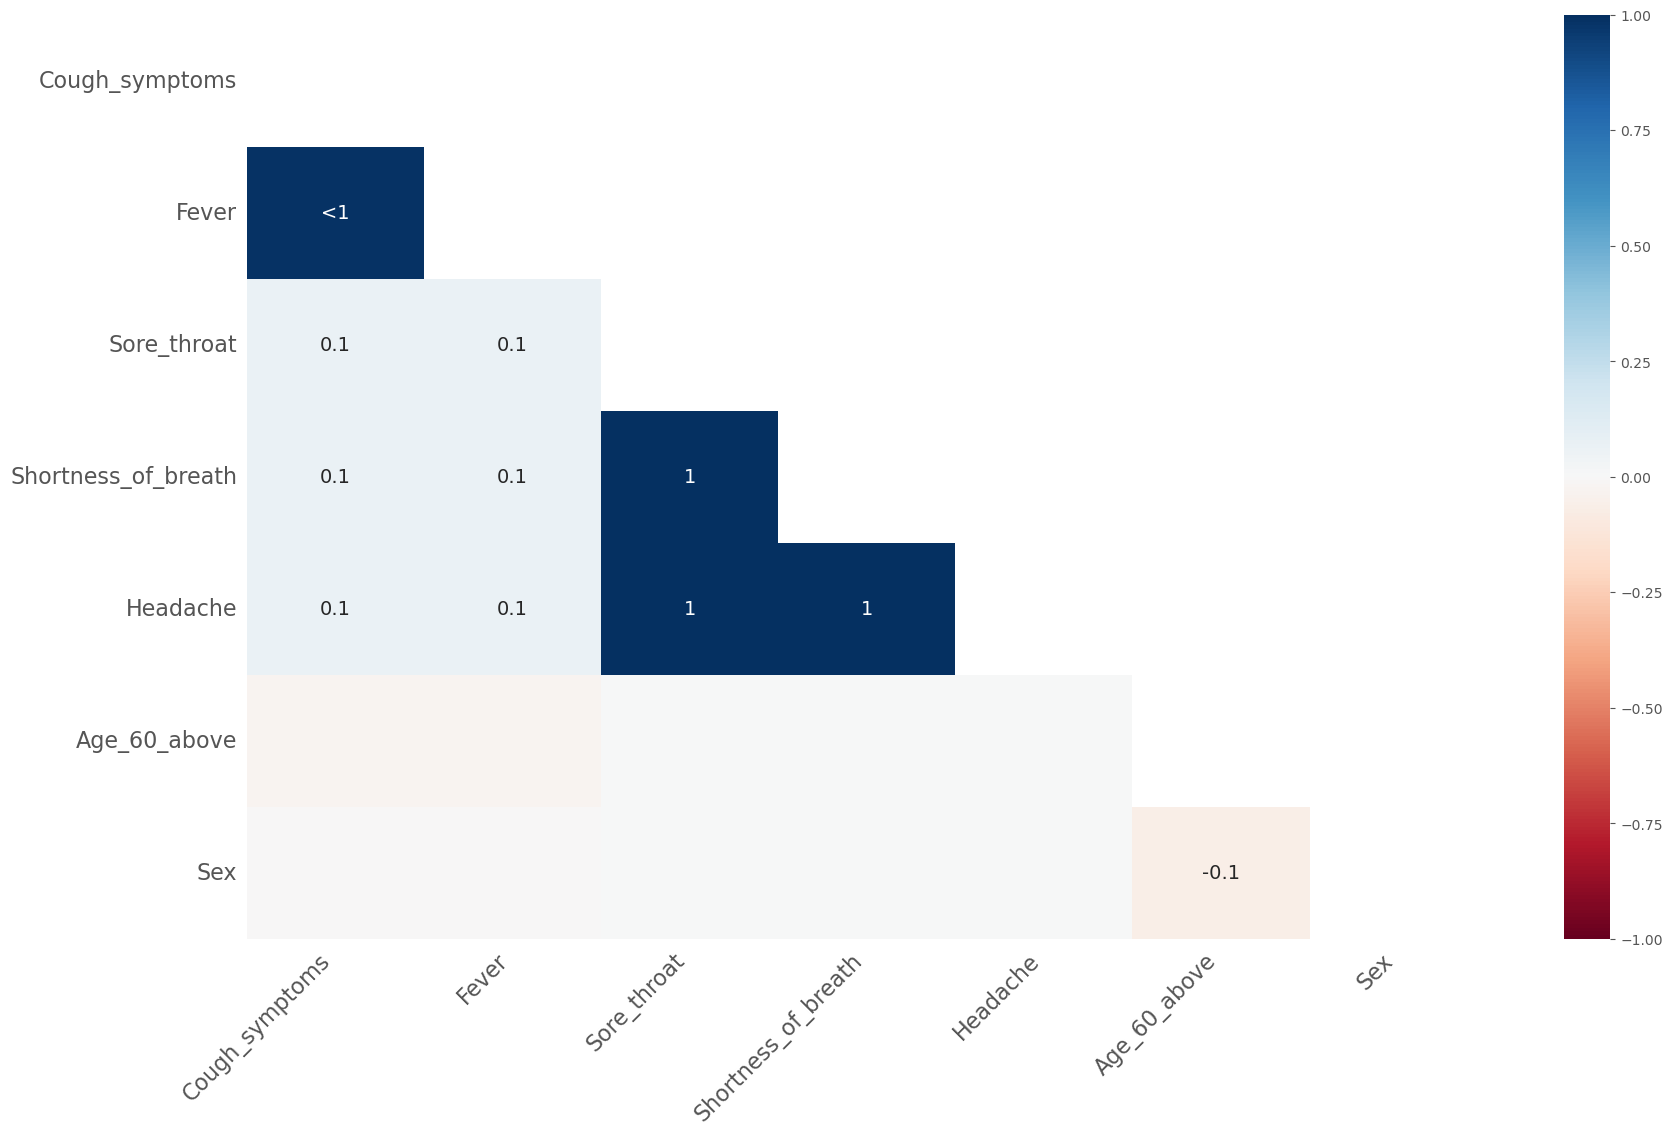

In [724]:
msno.heatmap(covid)

# Check Duplicates

In [725]:
covid.drop_duplicates() # check if there are duplicates

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [726]:
covid[covid.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


# Imputation(Replacing values)

In [727]:
## Converting null values of Sex column to others
value = 'other'
covid['Sex'].fillna(value,inplace=True)
covid


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,other,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,other,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,other,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [728]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [729]:
# Date_Time Formatting
covid['Test_date']=pd.to_datetime(covid['Test_date'], format='%d-%m-%Y')

In [730]:
#percentage of missing values
covid.isnull().sum()/len(covid) 

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000904
Fever                  0.000904
Sore_throat            0.000004
Shortness_of_breath    0.000004
Headache               0.000004
Corona                 0.000000
Age_60_above           0.456593
Sex                    0.000000
Known_contact          0.000000
dtype: float64

In [731]:
columns_to_replace = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']
#Replace boolean values and 'None' with appropriate strings and NaN
covid[columns_to_replace]=covid[columns_to_replace].replace({True: 'TRUE',False: 'FALSE', 'nan': np.nan})

In [732]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: <DatetimeArray>
['2020-03-11 00:00:00', '2020-03-12 00:00:00', '2020-03-13 00:00:00',
 '2020-03-14 00:00:00', '2020-03-15 00:00:00', '2020-03-16 00:00:00',
 '2020-03-17 00:00:00', '2020-03-18 00:00:00', '2020-03-19 00:00:00',
 '2020-03-20 00:00:00', '2020-03-21 00:00:00', '2020-03-22 00:00:00',
 '2020-03-23 00:00:00', '2020-03-24 00:00:00', '2020-03-25 00:00:00',
 '2020-03-26 00:00:00', '2020-03-27 00:00:00', '2020-03-28 00:00:00',
 '2020-03-29 00:00:00', '2020-03-30 00:00:00', '2020-03-31 00:00:00',
 '2020-04-01 00:00:00', '2020-04-02 00:00:00', '2020-04-03 00:00:00',
 '2020-04-04 00:00:00', '2020-04-05 00:00:00', '2020-04-06 00:00:00',
 '2020-04-07 00:00:00', '2020-04-08 00:00:00', '2020-04-09 00:00:00',
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00'

In [733]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [734]:
# percentage of missing values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                         0
Known_contact               0
dtype: int64

In [735]:
# drop null values
covid = covid.dropna(subset=['Age_60_above','Cough_symptoms','Fever'])

In [736]:
# check null values after droping null values
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [737]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


In [738]:
covid.nunique()

Ind_ID                 151279
Test_date                  29
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         3
Known_contact               3
dtype: int64

## Univariate and Multivariate Analysis (After cleaning data)

In [739]:
## Count total patients effected by corona
covid['Corona'].value_counts()

Corona
negative    137606
positive     11437
other         2236
Name: count, dtype: int64

In [740]:
#to fing count of total males and females 
covid['Sex'].value_counts()

Sex
male      70101
female    68071
other     13107
Name: count, dtype: int64

In [741]:
covid['Fever'].value_counts()

Fever
FALSE    137538
TRUE      13741
Name: count, dtype: int64

In [742]:
covid['Cough_symptoms'].value_counts()

Cough_symptoms
FALSE    124706
TRUE      26573
Name: count, dtype: int64

In [743]:
import matplotlib.pyplot as plt

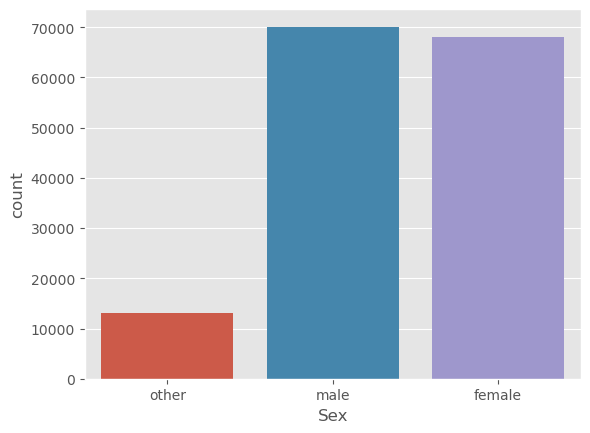

In [744]:
sns.countplot(x='Sex', data=covid)
plt.show()

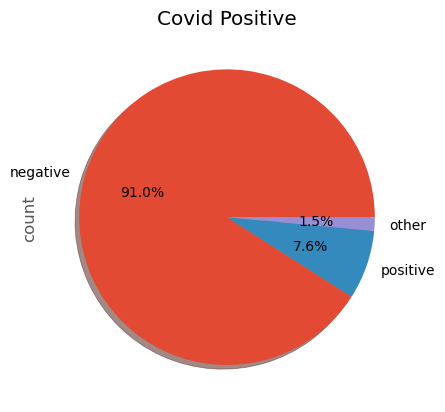

In [745]:
covid["Corona"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

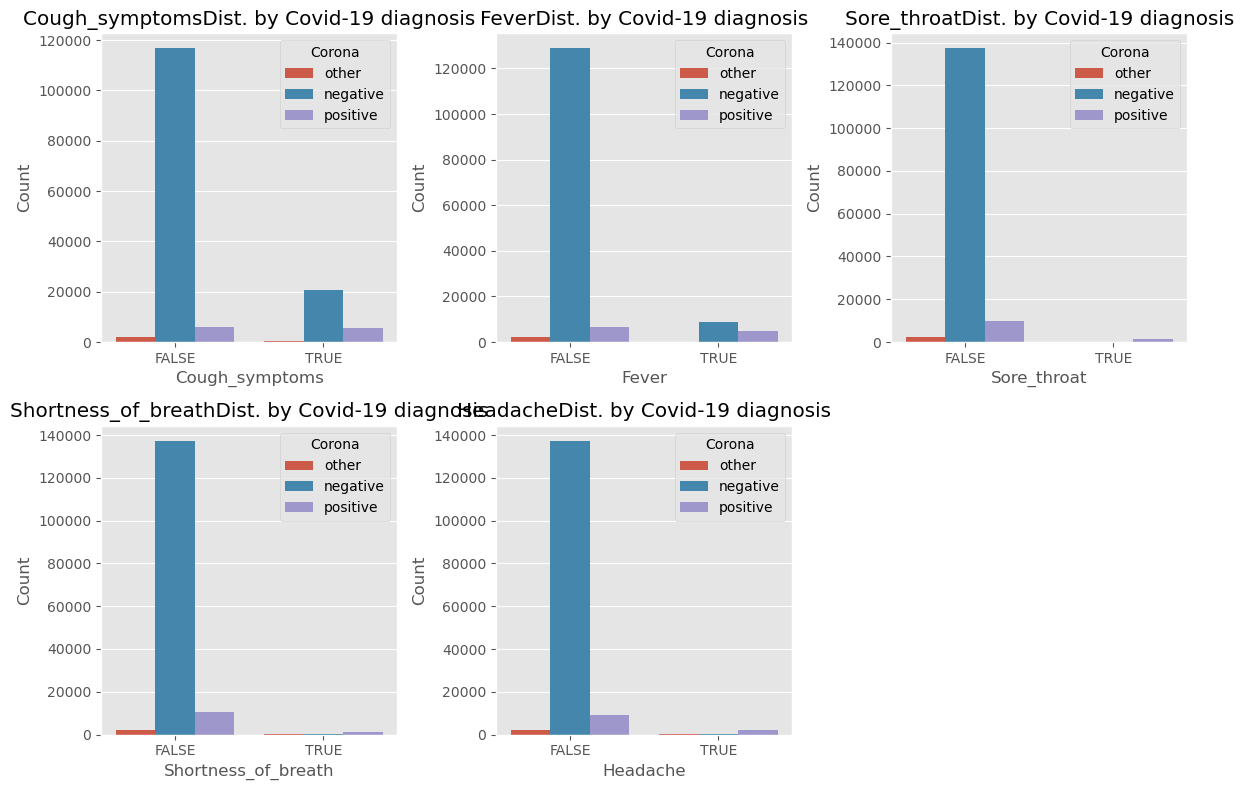

In [746]:
#Symptoms Distribution Visualisation
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache']
plt.figure(figsize=(12,8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2,3,i+1)
    sns.countplot(x=symptom,data = covid, hue='Corona')
    plt.title(f'{symptom}Dist. by Covid-19 diagnosis')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()
              

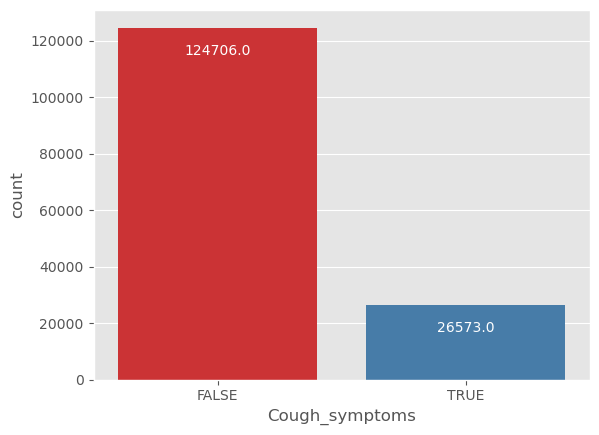

In [747]:
ax = sns.countplot(x='Cough_symptoms',data=covid, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

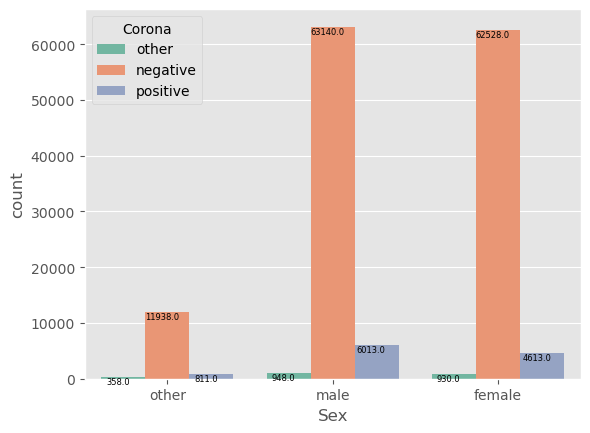

In [748]:
ax = sns.countplot(x='Sex',hue='Corona',data=covid, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='black', size=6)
plt.show()

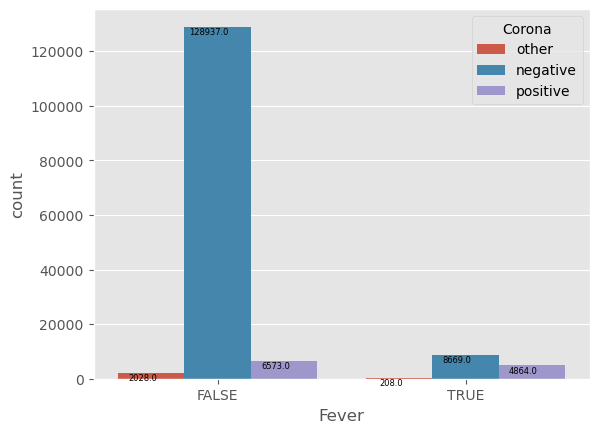

In [749]:
ax = sns.countplot(x='Fever',hue='Corona',data=covid)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='Black', size=6)
plt.show()

# Feature Engineering

## Data Splitting

In [750]:
df_train_val= covid.query("Test_date <= '2020-04-15' and Test_date >= '2020-03-11'")
df_test = covid.query("Test_date <= '2020-04-30' and Test_date >= '2020-03-16'")

In [751]:
df_train_val

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


### Dropping few unnecessary columns:

In [752]:
df_train_val= df_train_val.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex']) 
df_test= df_test.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex']) 


In [753]:
#covid = covid.drop([],axis=1)
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4513,FALSE,FALSE,FALSE,TRUE,FALSE,negative,Abroad
4514,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4515,FALSE,FALSE,FALSE,FALSE,FALSE,positive,Other
4516,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


In [754]:
df_test.tail()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
156035,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Abroad
156036,TRUE,FALSE,TRUE,TRUE,FALSE,negative,Abroad
156037,TRUE,TRUE,FALSE,FALSE,FALSE,negative,Abroad
156038,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other
156039,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


# Label Encoding

# Encoding train data

In [755]:
from sklearn.preprocessing import LabelEncoder

In [756]:
e=LabelEncoder()

In [757]:
df_train_val['Cough_symptoms']=e.fit_transform(df_train_val['Cough_symptoms'])

df_train_val['Fever']=e.fit_transform(df_train_val['Fever'])

df_train_val['Sore_throat']=e.fit_transform(df_train_val['Sore_throat'])

df_train_val['Shortness_of_breath']=e.fit_transform(df_train_val['Shortness_of_breath'])

df_train_val['Corona']=e.fit_transform(df_train_val['Corona'])

df_train_val['Headache']=e.fit_transform(df_train_val['Headache'])

df_train_val['Known_contact']=e.fit_transform(df_train_val['Known_contact'])



In [758]:
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


# Encoding test data

In [759]:
df_test['Cough_symptoms']=e.fit_transform(df_test['Cough_symptoms'])

df_test['Fever']=e.fit_transform(df_test['Fever'])

df_test['Sore_throat']=e.fit_transform(df_test['Sore_throat'])

df_test['Shortness_of_breath']=e.fit_transform(df_test['Shortness_of_breath'])

df_test['Corona']=e.fit_transform(df_test['Corona'])

df_test['Headache']=e.fit_transform(df_test['Headache'])

df_test['Known_contact']=e.fit_transform(df_test['Known_contact'])

In [760]:
df_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


# Scaling

In [761]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(df_train_val)
scaled_data = model.transform(df_train_val)
 
# print scaled data
print(scaled_data)

[[-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 ...
 [ 2.16632385  3.16375018 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]]


In [762]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


# Feature Selection - Using Chi-Square Test

In [763]:
#Libraries required for chi test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [764]:
X=df_train_val.drop(['Corona'],axis=1)
y = df_train_val['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X,y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P_values':p_values})
print(p_values_df)

               Feature  P_values
0       Cough_symptoms       0.0
1                Fever       0.0
2          Sore_throat       0.0
3  Shortness_of_breath       0.0
4             Headache       0.0
5        Known_contact       0.0


<Axes: >

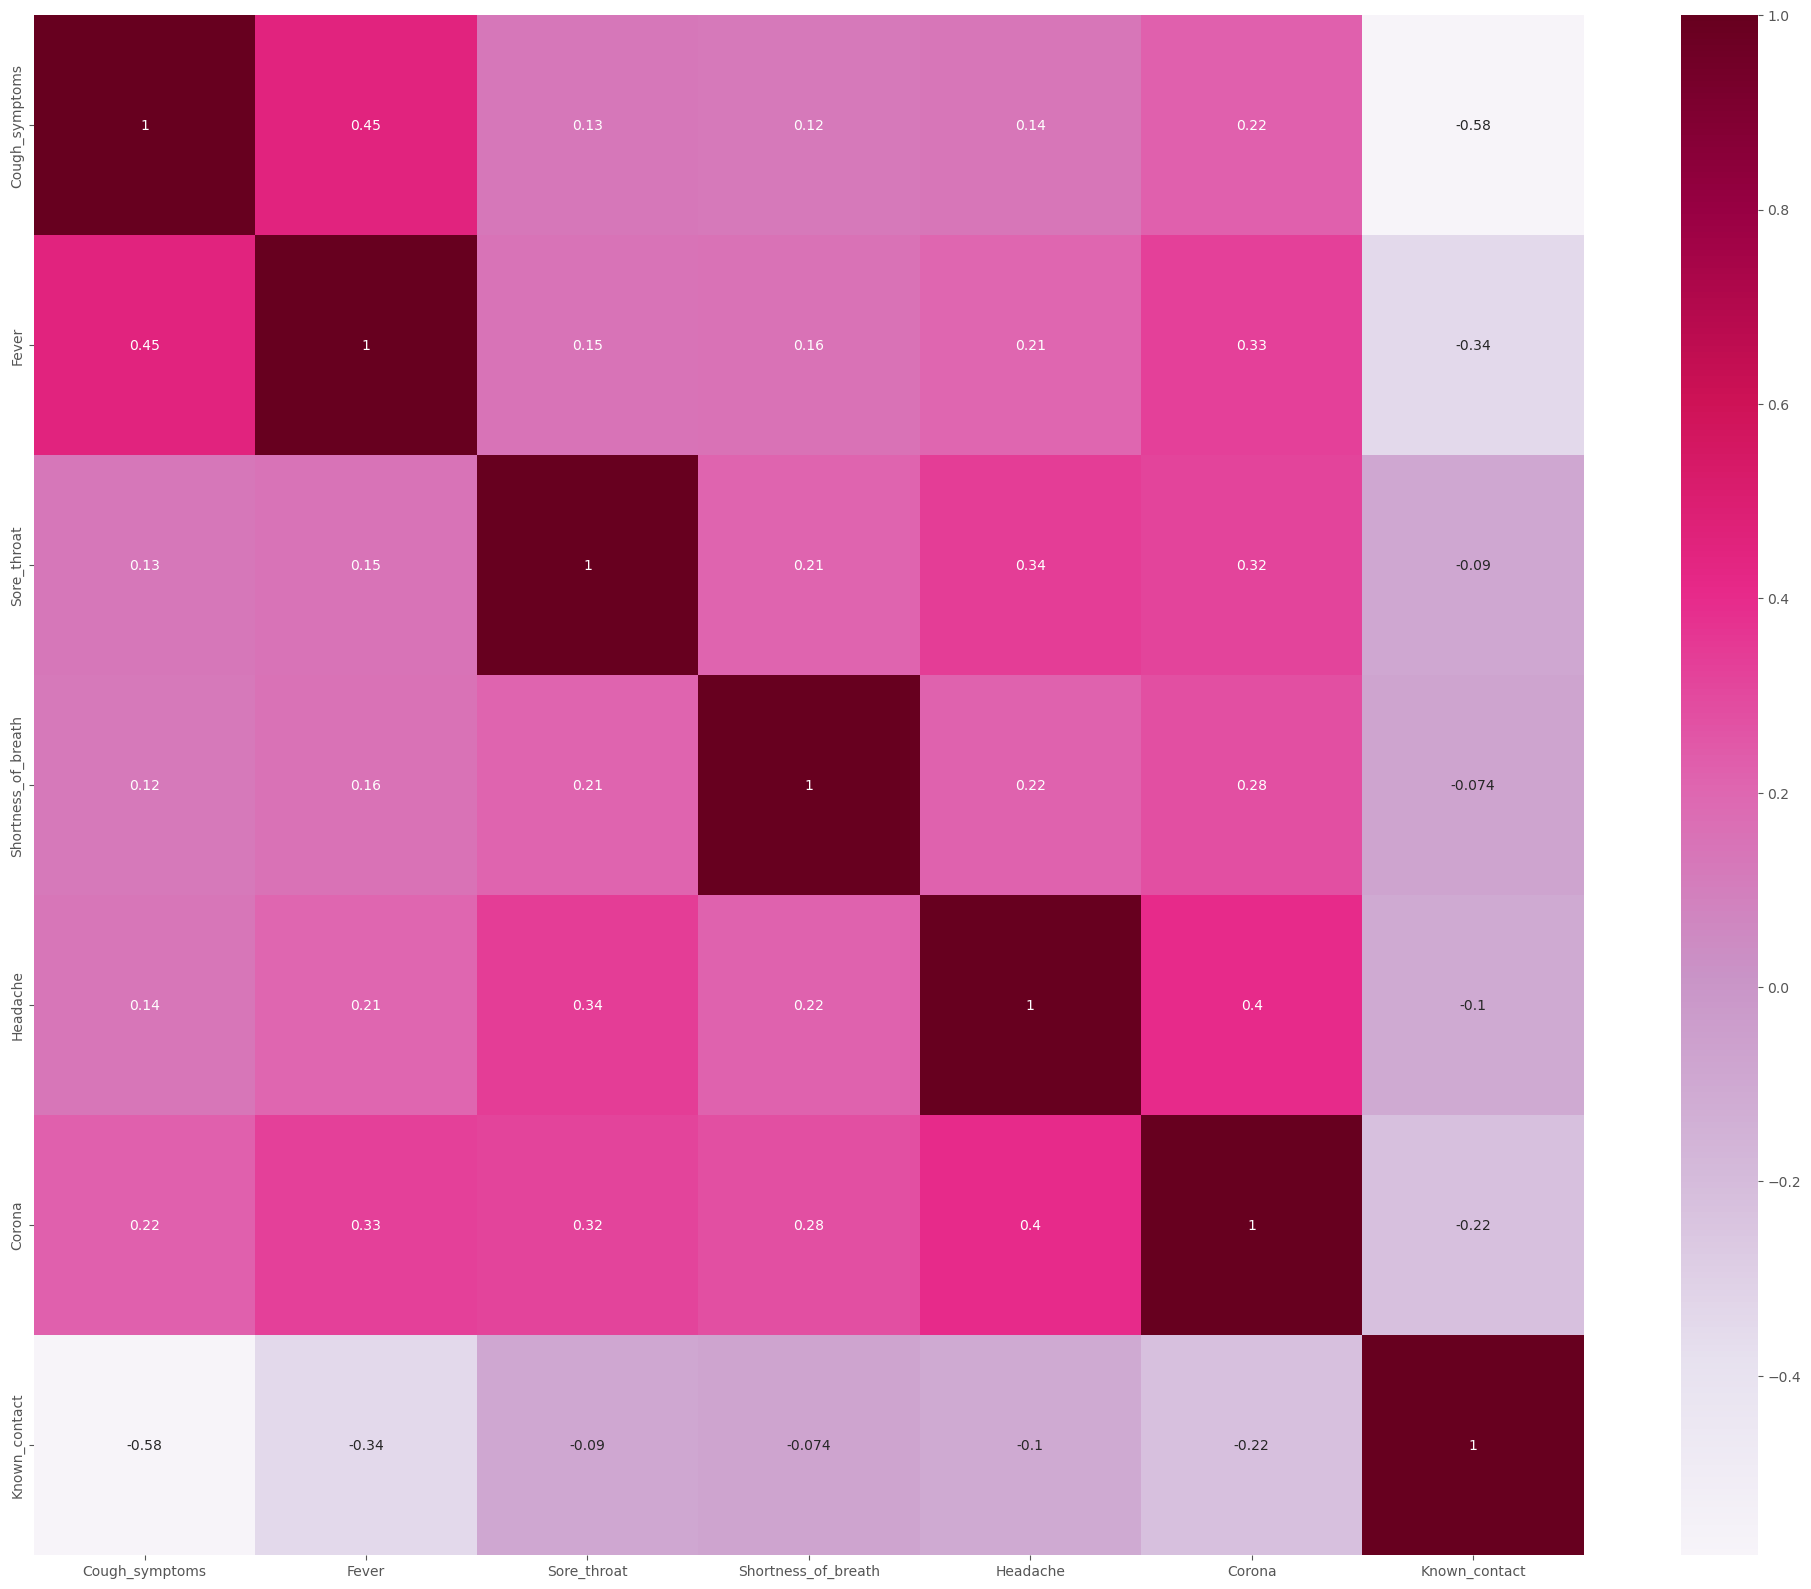

In [765]:
plt.figure(figsize=(25,20))  # Heat map to find correlation between features
sns.heatmap(df_train_val.corr(), annot=True, cmap="PuRd")

## selected features

# **Machine Learning Approach (Model Training)**



In [766]:
from sklearn.model_selection import train_test_split

In [767]:
#split the data into features(x) and target variable(y)
X = df_train_val.drop('Corona',axis=1)
y= df_train_val['Corona']

# split the date into training and validation sets:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)



In [768]:
#Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121023, 6)
X_test shape: (30256, 6)
y_train shape: (121023,)
y_test shape: (30256,)


## Model1- Logistic Regression

In [769]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create a Logistic Regression model
model1 = LogisticRegression(random_state = 0)

#Train the model on the training data
model1.fit(X_train,y_train)

#Make predictions on the validation data
y_pred1 = model1.predict(X_test)

# Calculate the accuracy of the model
accuracy= round(accuracy_score(y_test,y_pred1)*100,2)

print(f"Logistic regression Accuracy Score for the validating  Date: {accuracy}")

Logistic regression Accuracy Score for the validating  Date: 93.14


In [770]:
#split the data into features(x) and target variable(y)
X = df_test.drop('Corona',axis=1)
y= df_test['Corona']

#Make predictions on the test data
y_pred2= model1.predict(X)

#Calculate the accuracy of the model
accuracy = round(accuracy_score(y,y_pred2)*100,2)
print(f"Logistic regression Accuracy Score for the Test Date: {accuracy}")

Logistic regression Accuracy Score for the Test Date: 93.19


#### The accuracy we got using Logistic Regression on test data is 93.19%

In [771]:
#accuracy score
print(accuracy_score(y_test,y_pred1)) 

#r2 score
print(r2_score(y_test,y_pred1))

#Log_loss
logloss = log_loss(y_test, model1.predict_proba(X_test))
print(round(logloss,2))

0.9313524590163934
0.20295270448428304
0.26


### Hyper parameter Tuning

In [772]:
confusion_mat=confusion_matrix(y_test, y_pred1)
confusion_mat

array([[27467,     0,    53],
       [  408,     0,    14],
       [ 1602,     0,   712]], dtype=int64)

In [773]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [774]:
lr_mod_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X)
class_report_lr_best = classification_report(y, y_pred_best_lr)
print(f"Classification Report :\n {class_report_lr_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    137606
           1       0.00      0.00      0.00      2236
           2       0.91      0.32      0.47     11437

    accuracy                           0.93    151279
   macro avg       0.62      0.44      0.48    151279
weighted avg       0.92      0.93      0.91    151279



In [775]:
lrmodel_accuracy = round(accuracy_score(y, y_pred_best_lr)*100, 2)
print(f"Accuracy score after tuning : {lrmodel_accuracy}")

Accuracy score after tuning : 93.19


# Model2-Decision Tree

In [776]:
print(X_train.shape)
print(X_test.shape)

(121023, 6)
(30256, 6)


In [777]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
model2 = DecisionTreeClassifier()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for validation Data : {accuracy}")

Decision Tree Accuracy Score for validation Data : 94.46


In [778]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model2.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for Test Data : {accuracy}")

Decision Tree Accuracy Score for Test Data : 94.4


In [779]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[27233     0   287]
 [  392     0    30]
 [  966     0  1348]]


In [780]:
#Metrics Before tuning the data

print(recall_score(y_test,pred, average='micro'))

print(precision_score(y_test,pred, average='micro'))

print(accuracy_score(y_test,pred))

#print(f1_score(y_test,pred, average='micro'))

print(r2_score(y_test,pred))
logloss = log_loss(y_test, model2.predict_proba(X_test))
print(round(logloss,2))

0.9446390798519302
0.9446390798519302
0.9446390798519302
0.38495384779431896
0.22


### Hyper parameter Tuning

In [781]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(model2, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()


In [782]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X)
class_report_dt_best = classification_report(y, y_pred_best_dt)
print(f"Classification Report :\n {class_report_dt_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    137606
           1       0.00      0.00      0.00      2236
           2       0.81      0.58      0.68     11437

    accuracy                           0.94    151279
   macro avg       0.59      0.52      0.55    151279
weighted avg       0.93      0.94      0.93    151279



In [783]:
dtmodel_accuracy = round(accuracy_score(y, y_pred_best_dt)*100, 4)
print(f"Accuracy score after tuning : {dtmodel_accuracy}")

Accuracy score after tuning : 94.4017


# Model3- Random Forest

In [784]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create a RandomForestClassifier model:
model3= RandomForestClassifier()

# train the model on the training data
model3.fit(X_train,y_train)

#Make prediction on the validation date
pred2 = model3.predict(X_test)

#Calculate the accuracy of the model:
accuracy = round(accuracy_score(y_test, pred2)*100,2)
print(f'Random Forest Accuracy Score for Validation Data: {accuracy}')

Random Forest Accuracy Score for Validation Data: 94.46


In [785]:
#Metrics Before tuning the data:

print(recall_score(y_test,pred2, average='micro'))

print(precision_score(y_test,pred2, average='micro'))

print(f1_score(y_test,pred2, average='micro'))

print(accuracy_score(y_test,pred2))

print(r2_score(y_test,pred2))

logloss = log_loss(y_test, model3.predict_proba(X_test))
print(round(logloss,2))

0.9446390798519302
0.9446390798519302
0.9446390798519302
0.9446390798519302
0.38495384779431896
0.22


In [786]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model3.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,4)
print(f"Random Forest Accuracy Score for Test Data: {accuracy}")

Random Forest Accuracy Score for Test Data: 94.4017


### Hyper parameter Tuning

In [787]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 50, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(model3, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50)


In [788]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X)
class_report_rf_best = classification_report(y, y_pred_best_rf)
print(f"Classification Report :\n {class_report_rf_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    137606
           1       0.00      0.00      0.00      2236
           2       0.81      0.58      0.68     11437

    accuracy                           0.94    151279
   macro avg       0.59      0.52      0.55    151279
weighted avg       0.93      0.94      0.93    151279



In [789]:
rfmodel_accuracy = round(accuracy_score(y, y_pred_best_rf)*100, 4)
print(f"Accuracy score after tuning : {rfmodel_accuracy}")

Accuracy score after tuning : 94.4017


# Model4- Xgboost

In [790]:
!pip install xgboost

In [791]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [792]:
# Make predictions and find accuracy on the validation data
from xgboost import XGBClassifier
from sklearn import metrics
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred1=xgb2.predict(X_test)
accuracyg =metrics.accuracy_score(y_pred1,y_test)
print(accuracyg )

0.9446390798519302


In [793]:
# Make predictions and find accuracy on the test data
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X)
accuracyg =metrics.accuracy_score(y_pred,y)
print(accuracyg )

0.9440173454345944


In [794]:
#Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE: %f" % (rmse))


RMSE: 0.423793


In [795]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [796]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}

In [797]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [798]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.41514
Name: test-rmse-mean, dtype: float64


In [799]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb1=XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xgb1.fit(X_train,y_train)
ypred=xgb1.predict(X)
accuracyg =metrics.accuracy_score(ypred,y)
print(accuracyg )

0.9440173454345944


# Hyperparameter Tuning

In [800]:
# Define the hyperparameter grid to search for xgboost
param_grid_xg = {
    'n_estimators': [50, 50, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_xg = GridSearchCV(xgb2, param_grid_xg, cv=5, scoring='f1', n_jobs=-1)

grid_search_xg.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_xg = grid_search_xg.best_params_
best_model_xg = grid_search_xg.best_estimator_
print(best_params_xg)
print(best_model_xg)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, ...)


In [801]:
xg_mod_best = XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xg_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_xg = xg_mod_best.predict(X)
class_report_xg_best = classification_report(y, y_pred_best_xg)
print(f"Classification Report :\n {class_report_xg_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    137606
           1       0.00      0.00      0.00      2236
           2       0.81      0.58      0.68     11437

    accuracy                           0.94    151279
   macro avg       0.59      0.52      0.55    151279
weighted avg       0.93      0.94      0.93    151279



In [802]:
xgmodel_accuracy = round(accuracy_score(y,y_pred_best_xg)*100, 4)
print(f"Accuracy score after tuning : {xgmodel_accuracy}")

Accuracy score after tuning : 94.4017


# Model5 -SVM

In [803]:
from sklearn.svm import SVC

In [806]:
model_scm_class = SVC()
model_scm_class.fit(X_train,y_train)
# Make predictions and find accuracy on the validation data
pred = model_scm_class.predict(X_test)
accuracy_score(y_test,pred)

0.9446390798519302

In [805]:
# Make predictions and find accuracy on the test data
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']
model_scm_class = SVC()
model_scm_class.fit(X_train,y_train)
pred_y = model_scm_class.predict(X)
accuracy_score(y,pred_y)

0.9440173454345944

In [807]:
svm_gs = SVC()

In [808]:
?SVC

### Hyper parameter Tuning

In [809]:
#Hyperparameter tuning
S=SVC(C=1, kernel='rbf', random_state= 42)
S.fit(X_train,y_train)
y_pred=S.predict(X_test)
SVMaccuracy= round(accuracy_score(y_pred,y_test)*100,2)
print(SVMaccuracy)

94.46


# Cross validation 

In [810]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [811]:
?KNeighborsClassifier

In [812]:
Knn = KNeighborsClassifier(n_neighbors = 5, metric= 'euclidean')
Kfold = KFold(n_splits =5)
cv_result = cross_val_score(Knn, X,y,cv = 2)
cv_result
cv_result.mean()
cv_result.min()
cv_result.max()

0.8831290736260394

# **Model Comparison**

### Before crossvalidation and hyperparameter tuning

In [813]:
new_df=pd.DataFrame({"Models":["log","decisiontree","randomforest","xgboostclassifier",'SVM'],"accuracies":[ 93.14, 94.46,94.46,94.46,94.46]})

In [814]:
new_df

,Models,accuracies
0,log,93.14
1,decisiontree,94.46
2,randomforest,94.46
3,xgboostclassifier,94.46
4,SVM,94.46


<Axes: xlabel='Models', ylabel='accuracies'>

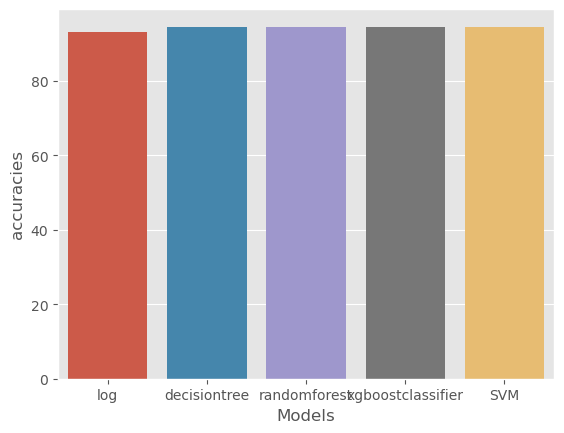

In [815]:
sns.barplot(new_df,x="Models",y="accuracies") # before crossvalidation and hyperparameter tuning

### After crossvalidation and hyperparameter tuning

In [816]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'xgboost','SVM ']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, xgmodel_accuracy, SVMaccuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)

            Model_Name Accuracy Score
0                 SVM          94.46%
1        Decision Tree       94.4017%
2        Random Forest       94.4017%
3              xgboost       94.4017%
4  Logistic Regression         93.19%


## Conclusion:

**Among all the models SVM and other regression models like Decision Tree, Random Forest and xgboost have shown good accuracy which shows our dataset will perform better adding more data would probably help in better prediction.**

# Lets perform SQL Queries to get the Insights:

In [817]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [818]:
# import Libraries
 
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [819]:
pip install duckdb

Note: you may need to restart the kernel to use updated packages.


In [820]:
conn.register("covid",covid)

In [821]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


##### **1) Find the number of corona patients who faced shortness of breath.**

In [822]:
conn.execute("SELECT Count(*) as covid_patient FROM covid WHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE'").fetchdf()

,covid_patient
0,1129


##### **2) Find the number of negative corona patients who have fever and sore_throat.**


In [823]:
conn.execute("SELECT COUNT(*) as covid_neg FROM covid WHERE Corona = 'negative' AND Fever = True AND Sore_throat = True").fetchdf()

,covid_neg
0,54


#####  **3) Group the data by month and rank the number of positive cases.**

In [824]:
conn.execute("select MONTH(Test_date) AS months, count(Corona) AS total_positive_cases, RANK() OVER (ORDER BY count(Corona) DESC) AS Ranks FROM covid WHERE Corona = 'positive' GROUP BY months").fetchdf()

,months,total_positive_cases,Ranks
0,4,5905,1
1,3,5532,2


##### **4) Find the female negative corona patients who faced cough and headache.**


In [825]:
conn.execute("select count(*) as count_females from covid where Sex= 'female' and Corona = 'negative' and Cough_symptoms = True and Headache = True").fetchdf()

,count_females
0,29


##### **5) How many elderly corona patients have faced breathing problems?**


In [826]:
conn.execute("select count(*) as elderpeople from covid where Age_60_above = 'Yes' and Corona = 'positive' and Shortness_of_breath = True ").fetchdf()

,elderpeople
0,262


##### **6) Which three symptoms were more common among COVID positive patients?**


In [827]:
conn.execute("select symptom, Sum(count) as Totalcount from (select 'Fever' as symptom, count(*) as count from covid where Corona = 'positive' and Fever = True UNION ALL select 'Headache' as symptom, count(*) as count from covid where Corona = 'positive' and Headache = True UNION ALL select 'Sore_throat' as symptom , count(*) from covid where Corona = 'positive'and Sore_throat = True UNION ALL select 'Cough_symptoms' as symptom, count(*) from covid where Corona = 'positive' and Cough_symptoms = True UNION ALL select 'Shortness_of_breath' as symptom , count(*) from covid where Corona = 'positive' and Shortness_of_breath = True) as C group by symptom order by Totalcount desc limit 3  ").fetchdf()

,symptom,Totalcount
0,Cough_symptoms,5470.0
1,Fever,4864.0
2,Headache,2175.0


##### **7) Which symptom was less common among COVID negative people?**


In [828]:
conn.execute("select symptom, Sum(count) as Totalcount from (select 'Fever' as symptom, count(*) as count from covid where Corona = 'negative' and Fever = True UNION ALL select 'Headache' as symptom, count(*) as count from covid where Corona = 'negative' and Headache = True UNION ALL select 'Sore_throat' as symptom , count(*) from covid where Corona = 'negative'and Sore_throat = True UNION ALL select 'Cough_symptoms' as symptom, count(*) from covid where Corona = 'negative' and Cough_symptoms = True UNION ALL select 'Shortness_of_breath' as symptom , count(*) from covid where Corona = 'negative' and Shortness_of_breath = True) as C group by symptom order by Totalcount asc   ").fetchdf()

,symptom,Totalcount
0,Headache,98.0
1,Shortness_of_breath,130.0
2,Sore_throat,152.0
3,Fever,8669.0
4,Cough_symptoms,20767.0


##### **8) What are the most common symptoms among COVID positive males whose known contact was abroad?**


In [829]:
conn.execute("select symptom, Sum(count) as Totalcount from (select 'Fever' as symptom, count(*) as count from covid where Corona = 'positive' and Sex = 'male' and Fever = True and Known_contact = 'Abroad' UNION ALL select 'Headache' as symptom, count(Headache) as count from covid where Corona = 'positive' and Headache = True and Sex = 'male' and Known_contact = 'Abroad' UNION ALL select 'Sore_throat' as symptom , count(*) from covid where Corona = 'positive'and Sore_throat = True and Sex = 'male' and Known_contact = 'Abroad' UNION ALL select 'Cough_symptoms' as symptom, count(*) from covid where Corona = 'positive' and Cough_symptoms = True and Sex = 'male' and Known_contact = 'Abroad' UNION ALL select 'Shortness_of_breath' as symptom , count(*) from covid where Corona = 'positive' and Shortness_of_breath = True and Sex = 'male' and Known_contact = 'Abroad') as C group by symptom order by Totalcount desc ").fetchdf()

,symptom,Totalcount
0,Cough_symptoms,508.0
1,Fever,390.0
2,Headache,129.0
3,Sore_throat,87.0
4,Shortness_of_breath,84.0


## Initial Hypothesis¶

1. **Common Symptoms Hypothesis:** COVID-19 often causes coughing, fever, and breathing problems but headache was also common among them. 

---

2. **Uncommon Symptoms Hypothesis:** People without COVID-19  have less headache and Shortness of breath and more symptoms of cough and fever.

---

3. **Symptoms in Specific Groups:** Men with COVID-19 who've been in contact with people from other countries  have more coughing and fever.

---

4. **Age and Severity Hypothesis:** Those 60 and older have more severe symptoms, especially trouble breathing.